In [1]:
from oyv.imports import *
import os
import gsw
from scipy.optimize import curve_fit

In [2]:
os.chdir('/home/oyvindl/work/code/git_public/ice_ocean_plume/')
%run ice_ocean_plume.py
os.chdir('/home/oyvindl/work/projects/barents_glaciers/glacierocean-austfonna/'
         'plume_model/data/make_profiles/idealized_constantN')
dummy_ = np.arange(200)
ioplume = plume(10, 100, dummy_, dummy_, dummy_, 2)
ioplume.set_params()

In [3]:
def get_tempsal(DEP, TTOP, TBTM, SBTM, N2, dz =1, rho0 = 1027):
    dep = np.arange(0, DEP+dz/2, dz)
    n = len(dep)
    temp = TTOP + np.arange(n)/n*(TBTM-TTOP)
    
    dtemp_dz = -np.diff(temp)/dz
    dsal_dz = (ioplume.BT*dtemp_dz - N2/ioplume.g)/ioplume.BS
    sal = np.concatenate([np.array([SBTM]), SBTM + np.cumsum(dsal_dz)])[::-1]
    
    drho_dz = rho0*(ioplume.BS*dsal_dz - ioplume.BT*dtemp_dz)
    n2 = -ioplume.g/rho0*drho_dz
    return temp, sal, dep, n2

In [4]:
%matplotlib inline

#### Quick test case (Warm deep water)

In [9]:
### Universal parameters
DEP = 100
SBTM = 34.7
N2 = 1e-5
dz = 1

In [13]:
temp, sal, dep, n2 = get_tempsal(DEP, 2, 2, SBTM, N2, dz = dz)

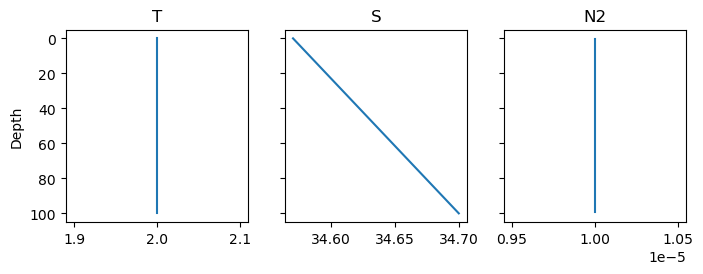

In [14]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (8, 2.5))
ax[0].plot(temp, dep)
ax[1].plot(sal, dep)
ax[2].plot(n2, dep[:-1]+dz/2)
ax[0].set_title('T')
ax[1].set_title('S')
ax[2].set_title('N2')
ax[0].set_ylabel('Depth')

ax[2].invert_yaxis()

LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)


(105.0, 0.0)

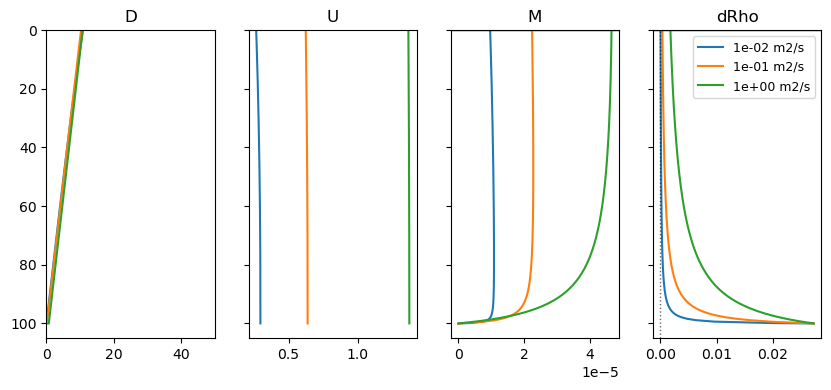

In [15]:
fig, ax = plt.subplots(1, 4, sharey = True, figsize = (10, 4))

for volfl in [1e-2, 1e-1, 1e0]:
    P = plume(DEP, volfl, temp, sal, dep)
    P.set_params()
    P.solve()
    lab = '%.0e m2/s'%volfl
    
    ax[0].plot(P.D_pl, P.dep_pl)
    ax[1].plot(P.U_pl, P.dep_pl)
    ax[2].plot(P.M_pl, P.dep_pl)
    ax[3].plot(P.dRho_pl, P.dep_pl, label = lab)
    pl.hline(P.neut_dep, ax = ax[3], alpha = 0.3)
    pl.hline(P.min_dep, ax = ax[2], alpha = 0.3)

pl.vline(0, ax[3], alpha = 0.6, ls = ':')
ax[3].legend(fontsize = 9)
ax[0].set_title('D')
ax[1].set_title('U')
ax[2].set_title('M')
ax[3].set_title('dRho')

ax[0].set_xlim(0, 50)
ax[0].set_ylim(105, 0)

#### Quick test case (Warm surface water)

In [67]:
temp, sal, dep, n2 = get_tempsal(DEP, 2, 0, SBTM, N2, dz = dz)

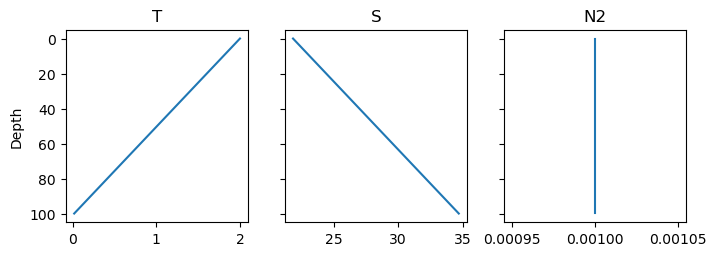

In [68]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (8, 2.5))
ax[0].plot(temp, dep)
ax[1].plot(sal, dep)
ax[2].plot(n2, dep[:-1]+dz/2)
ax[0].set_title('T')
ax[1].set_title('S')
ax[2].set_title('N2')
ax[0].set_ylabel('Depth')

ax[2].invert_yaxis()

LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)
LINE plume integration complete. (Success: True)


(105.0, 0.0)

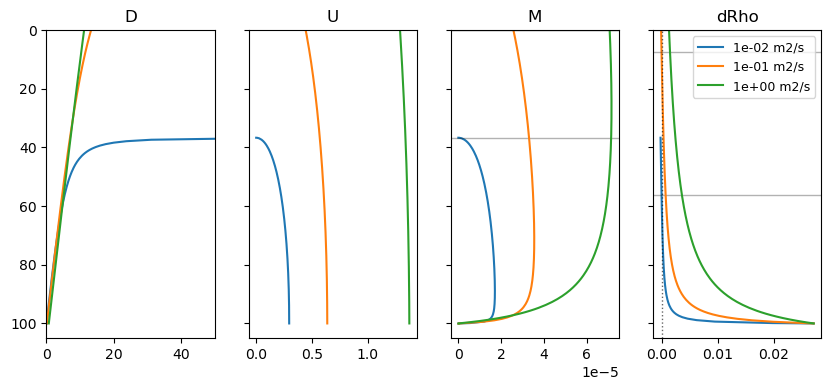

In [96]:
fig, ax = plt.subplots(1, 4, sharey = True, figsize = (10, 4))

for volfl in [1e-2, 1e-1, 1e0]:
    P = plume(DEP, volfl, temp, sal, dep)
    P.set_params()
    P.solve()
    lab = '%.0e m2/s'%volfl
    
    ax[0].plot(P.D_pl, P.dep_pl)
    ax[1].plot(P.U_pl, P.dep_pl)
    ax[2].plot(P.M_pl, P.dep_pl)
    ax[3].plot(P.dRho_pl, P.dep_pl, label = lab)
    pl.hline(P.neut_dep, ax = ax[3], alpha = 0.3)
    pl.hline(P.min_dep, ax = ax[2], alpha = 0.3)

pl.vline(0, ax[3], alpha = 0.6, ls = ':')
ax[3].legend(fontsize = 9)
ax[0].set_title('D')
ax[1].set_title('U')
ax[2].set_title('M')
ax[3].set_title('dRho')

ax[0].set_xlim(0, 50)
ax[0].set_ylim(105, 0)

In [97]:
P.melt_total

0.00647757609139318

### Systematic experiments

In [16]:
### Universal parameters
DEP = 100
TTOPS = np.arange(-2, 4.01, 1/3)
TBTMS = np.arange(-2, 4.5, 1/3)
SBTM = 34.7
N2 = 1e-4

In [17]:
# Empty (nan) arrays
melt_integrated = np.zeros([len(TTOPS), len(TBTMS)])*np.nan
melt_max = melt_integrated.copy()
melt_mean = melt_integrated.copy()
neut_dep = melt_integrated.copy()
min_dep = melt_integrated.copy()

In [46]:
sal

array([33.40309416, 33.41606322, 33.42903227, 33.44200133, 33.45497039,
       33.46793945, 33.48090851, 33.49387757, 33.50684663, 33.51981568,
       33.53278474, 33.5457538 , 33.55872286, 33.57169192, 33.58466098,
       33.59763003, 33.61059909, 33.62356815, 33.63653721, 33.64950627,
       33.66247533, 33.67544438, 33.68841344, 33.7013825 , 33.71435156,
       33.72732062, 33.74028968, 33.75325874, 33.76622779, 33.77919685,
       33.79216591, 33.80513497, 33.81810403, 33.83107309, 33.84404214,
       33.8570112 , 33.86998026, 33.88294932, 33.89591838, 33.90888744,
       33.92185649, 33.93482555, 33.94779461, 33.96076367, 33.97373273,
       33.98670179, 33.99967085, 34.0126399 , 34.02560896, 34.03857802,
       34.05154708, 34.06451614, 34.0774852 , 34.09045425, 34.10342331,
       34.11639237, 34.12936143, 34.14233049, 34.15529955, 34.1682686 ,
       34.18123766, 34.19420672, 34.20717578, 34.22014484, 34.2331139 ,
       34.24608296, 34.25905201, 34.27202107, 34.28499013, 34.29

In [61]:
volfl = 1e-2

count = 1
Ncount = len(melt_max.flatten())
for nn, Ttop in enumerate(TTOPS):
    for mm, Tbtm in enumerate(TBTMS):

        print('Plume %i/%i..\r'%(count, Ncount), end = '')
        
        temp, sal, dep, n2 = get_tempsal(DEP, Ttop, Tbtm, SBTM, N2, dz = dz)
        P = plume(DEP, volfl, temp, sal, dep)
        P.set_params()
        P.solve(suppress_endmsg = True)
        
        
        melt_integrated[nn, mm] = P.melt_total
        melt_max[nn, mm] = P.M_pl.max()
        melt_mean[nn, mm] = P.melt_total/(P.dep0-P.min_dep)
        neut_dep[nn, mm] = P.neut_dep
        min_dep[nn, mm] = P.min_dep

        count+=1

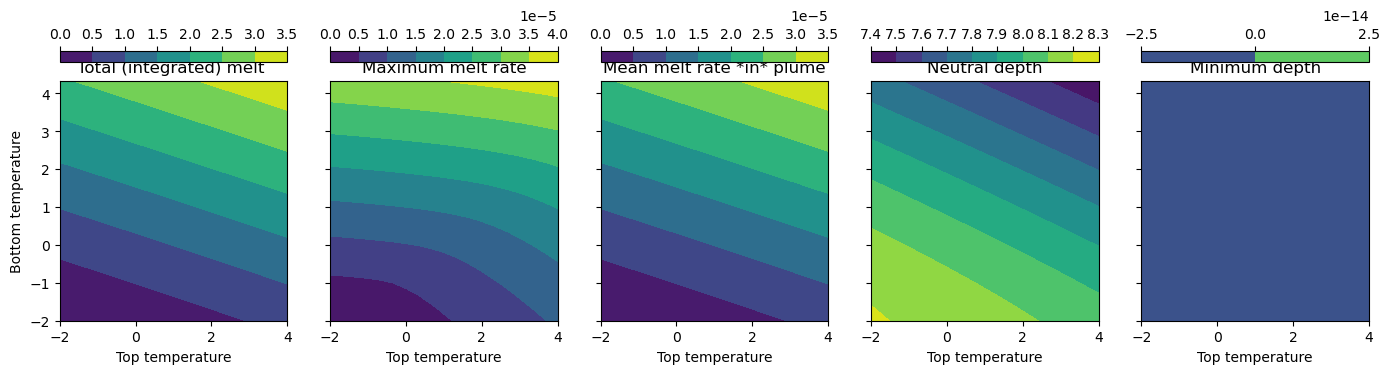

In [48]:
fig, ax = plt.subplots(1, 5, sharex = True, sharey = True, figsize = (14, 4))
for axn in ax:
    axn.set_aspect('equal')
    
fact1 = 1e3
    
C0 = ax[0].contourf(TTOPS, TBTMS, fact1*melt_integrated.T)
C1 = ax[1].contourf(TTOPS, TBTMS, melt_max.T)
C2 = ax[2].contourf(TTOPS, TBTMS, melt_mean.T)
C3 = ax[3].contourf(TTOPS, TBTMS, neut_dep.T)
C4 = ax[4].contourf(TTOPS, TBTMS, min_dep.T)

cb1 = plt.colorbar(C0, ax = ax[0], location = 'top',)
cb2 = plt.colorbar(C1, ax = ax[1], location = 'top', )
cb3 = plt.colorbar(C2, ax = ax[2], location = 'top', )
cb4 = plt.colorbar(C3, ax = ax[3], location = 'top', )
cb5 = plt.colorbar(C4, ax = ax[4], location = 'top', )

ax[0].set_title('Total (integrated) melt ')
ax[1].set_title('Maximum melt rate')
ax[2].set_title('Mean melt rate *in* plume')
ax[3].set_title('Neutral depth')
ax[4].set_title('Minimum depth')


ax[0].set_ylabel('Bottom temperature')
for axn in ax:
    axn.set_xlabel('Top temperature')
    
plt.tight_layout()

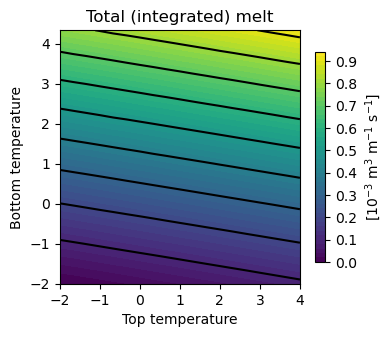

In [63]:
fig, ax = plt.subplots( figsize = (4, 4))
ax.set_aspect('equal')
    
fact1 = 1e3
    
C0 = ax.contourf(TTOPS, TBTMS, fact1*melt_integrated.T, levels = 50)
ax.contour(TTOPS, TBTMS, fact1*melt_integrated.T, levels = np.arange(0, 1.1, 0.1), colors = 'k')

cb1 = plt.colorbar(C0, ax = ax, shrink = 0.6, label =  '[10$^{-3}$ m$^3$ m$^{-1}$ s$^{-1}$]')#location = 'top',)


ax.set_title('Total (integrated) melt')


ax.set_ylabel('Bottom temperature')
#for axn in ax:
ax.set_xlabel('Top temperature')
ax.set_xticks(np.arange(-2, 5))
plt.tight_layout()
fig.savefig('Totalmelt_bottom_top_q_%.1e.png'%volfl, transparent = True)

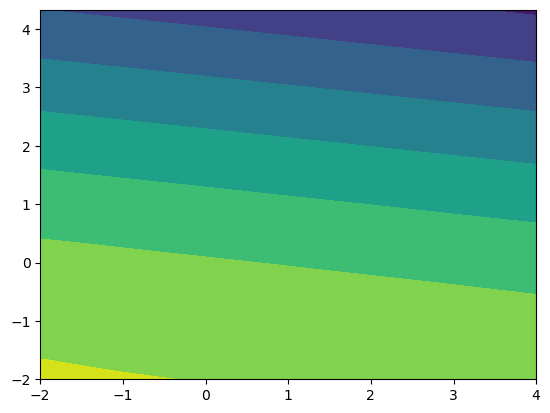

In [237]:
fig, ax = plt.subplots()
ax.contourf(TTOPS, TBTMS, neut_dep.T)

In [245]:
temp, sal, dep, n2 = get_tempsal(DEP, 4, -1, SBTM, N2, dz = dz)
volfl = 1e-2
P = plume(DEP, volfl, temp, sal, dep)
P.set_params()
P.solve(suppress_endmsg = True)

In [249]:
temp2, sal2, dep2, n2 = get_tempsal(DEP, -1, 4, SBTM, N2, dz = dz)
volfl = 1e-2
P2 = plume(DEP, volfl, temp2, sal2, dep2)
P2.set_params()
P2.solve(suppress_endmsg = True)

(102.0, -2.0)

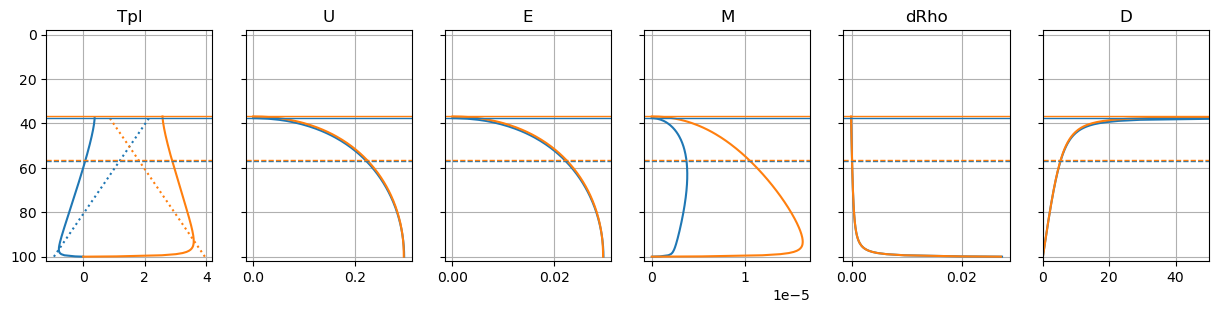

In [254]:
fig, ax = plt.subplots(1, 6, sharey = True, figsize = (15, 3))
ax[0].plot(P.T_pl, P.dep_pl)
ax[0].plot(P2.T_pl, P2.dep_pl)

ax[0].plot(P.Ta_pl, P.dep_pl, ls = ':', color = col.col('b'))
ax[0].plot(P2.Ta_pl, P2.dep_pl, ls = ':', color = col.col('o'))

ax[1].plot(P.U_pl, P.dep_pl)
ax[1].plot(P2.U_pl, P2.dep_pl)

ax[2].plot(P.E_pl, P.dep_pl)
ax[2].plot(P2.E_pl, P2.dep_pl)

ax[3].plot(P.M_pl, P.dep_pl)
ax[3].plot(P2.M_pl, P2.dep_pl)

ax[4].plot(P.dRho_pl, P.dep_pl)
ax[4].plot(P2.dRho_pl, P2.dep_pl)

ax[5].plot(P.D_pl, P.dep_pl)
ax[5].plot(P2.D_pl, P2.dep_pl)

ax[5].set_xlim(0, 50)
for axn, title in zip(ax, ['Tpl', 'U', 'E', 'M', 'dRho', 'D']):
    axn.grid()
    axn.set_title(title)
    pl.hline(P.neut_dep, ax = axn, ls = '--', col = col.col('b'))
    pl.hline(P2.neut_dep, ax = axn, ls = '--', col = col.col('o'))
    pl.hline(P.min_dep, ax = axn, ls = '-', col = col.col('b'))
    pl.hline(P2.min_dep, ax = axn, ls = '-', col = col.col('o'))
ax[0].set_ylim(102, -2)


## Reproduce the functional dependence of M on temperature and discharge

From Beckmann et al:

Large Qsg:
    $$M\propto \Delta T\ (q_{SG})^{1/3}$$
    
    
Small Qsg:
    $$M\propto \Delta T^{3/2}$$

### Large discharge:



##### Dependence on thermal driving

In [336]:
P.Tf_a

array([-1.82901   , -1.8290112 , -1.82902014, -1.82902907, -1.82903801,
       -1.82904695, -1.82905588, -1.82906482, -1.82907376, -1.82908269,
       -1.82909163, -1.82910057, -1.8291095 , -1.82911844, -1.82912738,
       -1.82913631, -1.82914525, -1.82915419, -1.82916312, -1.82917206,
       -1.82918099, -1.82918993, -1.82919887, -1.8292078 , -1.82921674,
       -1.82922568, -1.82923461, -1.82924355, -1.82925249, -1.82925462,
       -1.82925507, -1.82925551, -1.82925617, -1.82925684, -1.82925713])

In [338]:
Tf = -1.82

In [345]:
volfl = 1e-1

Trange = np.arange(Tf, 2.1, 0.1)
M_to_neut = Trange*0
M_total = Trange*0
M_max = Trange*0

for nn, T in enumerate(Trange):
    print('Plume: %.2fC..\r'%T, end = '' )
    temp, sal, dep, n2 = get_tempsal(DEP, T, T, SBTM, N2, dz = dz)
    P = plume(DEP, volfl, temp, sal, dep)
    P.set_params()
    P.solve(suppress_endmsg = True)
    M_to_neut[nn] = P.melt_to_neutral
    M_total[nn] = P.melt_total
    M_max[nn] = P.M_pl.max()

In [346]:
# Fit 

def f(x, A, b,):
    M = A*x**b
    return M

a_, b_ = curve_fit(f, Trange-Tf, M_to_neut, )[0]

/tmp/ipykernel_12970/143289988.py:4: RuntimeWarning: invalid value encountered in double_scalars
  M = A*x**b


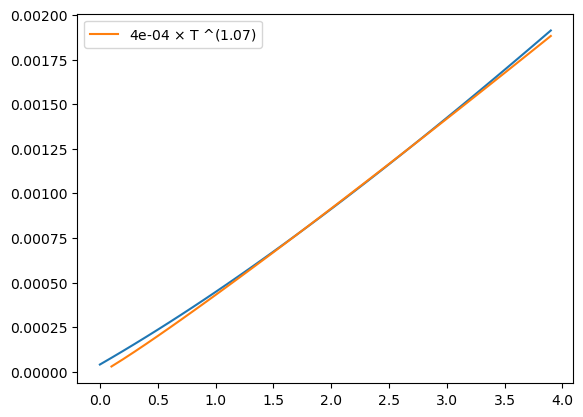

In [347]:
fig, ax = plt.subplots()
ax.plot(Trange-Tf, M_to_neut)
ax.plot(Trange-Tf, [f(T, a_, b_) for T in Trange+1.8], label = '%.e $\\times$ T ^(%.2f)'%(a_, b_))
ax.legend()

##### Dependence on Q

In [370]:
T = 2

Qexp = np.arange(-1, 0, 0.01)
Qrange = 10**(Qexp)



M_to_neut_q = Qrange*0
M_total_q = Qrange*0
M_max_q = Qrange*0

temp, sal, dep, n2 = get_tempsal(DEP, T, T, SBTM, N2, dz = dz)

for nn, Q in enumerate(Qrange):
    print('Plume: %.2f m2/s..\r'%Q, end = '' )
    P = plume(DEP, Q, temp, sal, dep)
    P.set_params()
    P.solve(suppress_endmsg = True)
    M_to_neut_q[nn] = P.melt_to_neutral
    M_total_q[nn] = P.melt_total
    M_max_q[nn] = P.M_pl.max()


In [371]:
def f(x, A, b,):
    M = A*x**b
    return M

In [372]:
aQ_, bQ_ = curve_fit(f, Qrange, M_to_neut_q, )[0]

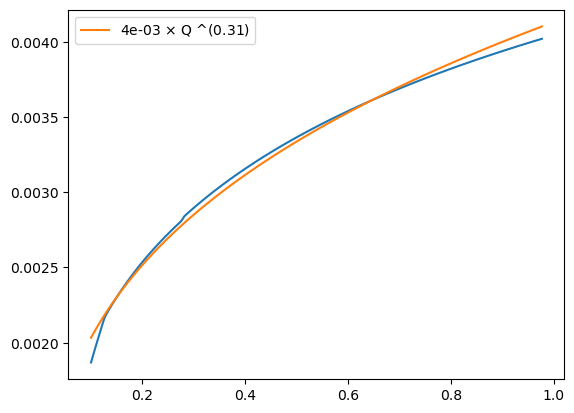

In [373]:
fig, ax = plt.subplots()
ax.plot(Qrange, M_to_neut_q)
ax.plot(Qrange, [f(q, aQ_, bQ_) for q in Qrange], label = '%.e $\\times$ Q ^(%.2f)'%(aQ_, bQ_))
ax.legend()

### Small discharge

In [329]:
volfl = 1e-3

Trange = np.arange(-1, 6.1, 0.1)
M_to_neut = Trange*0
M_total = Trange*0
M_max = Trange*0

for nn, T in enumerate(Trange):
    print('Plume: %.2fC..\r'%T, end = '' )
    temp, sal, dep, n2 = get_tempsal(DEP, T, T, SBTM, N2, dz = dz)
    P = plume(DEP, volfl, temp, sal, dep, T0melt = True)
    P.set_params()
    P.solve(suppress_endmsg = True)
    M_to_neut[nn] = P.melt_to_neutral
    M_total[nn] = P.melt_total
    M_max[nn] = P.M_pl.max()

In [330]:
# Fit 

def f(x, A, b,):
    M = A*x**b
    return M

a_, b_ = curve_fit(f, Trange+1.8, M_to_neut, )[0]

In [335]:
P.S_pl

array([31.81611731, 32.61808838, 34.01182551, 34.27824573, 34.38929472,
       34.44910605, 34.4857664 , 34.51001304, 34.52683713, 34.53887405,
       34.54764684, 34.55409745, 34.55884011, 34.56229288, 34.56475061,
       34.5664277 , 34.56748425, 34.56804285, 34.56819955, 34.56803141,
       34.56760189, 34.56696473, 34.56616711, 34.56525236, 34.56426267,
       34.56324246, 34.56224389, 34.56133855, 34.56065866, 34.56056637,
       34.56055432, 34.56054642, 34.56053041, 34.56051256, 34.56050541])

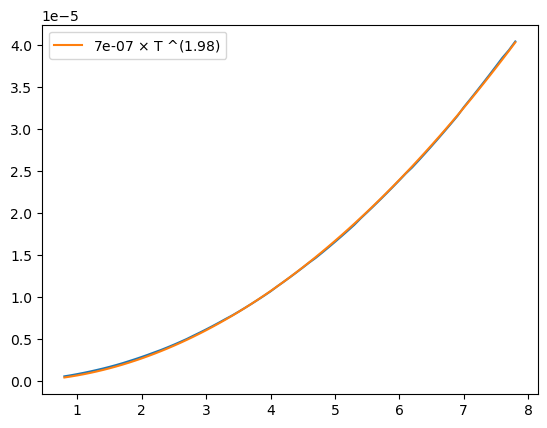

In [331]:
fig, ax = plt.subplots()
ax.plot(Trange+1.8, M_to_neut)
ax.plot(Trange+1.8, [f(T, a_, b_) for T in Trange+1.8], label = '%.e $\\times$ T ^(%.2f)'%(a_, b_))
ax.legend()